# 整数域上的折叠实现

## 磨光技术：rising cutoff functioin

```{literalinclude} ../../../src/python/lft/rcf.py
---
language: python
---
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys

from rcf import rcfis
import fold
from qiplot import plot_ts
import qisignal
from qisignal import *
from utils import *
plt.style.use(['ggplot','../../presentation.mplstyle'])

In [2]:
r=rcfis.grid(32,1)

In [3]:
r.type()

'grid'

In [4]:
len(r)

63

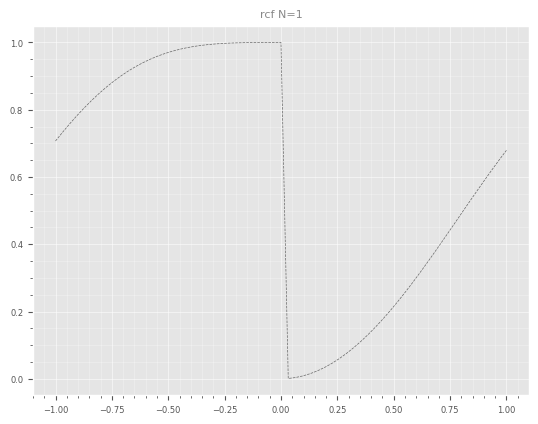

In [5]:
fig,ax=plt.subplots()
t=np.linspace(-1,1,len(r))
plot_ts(ax,t,r,title='rcf N=1')

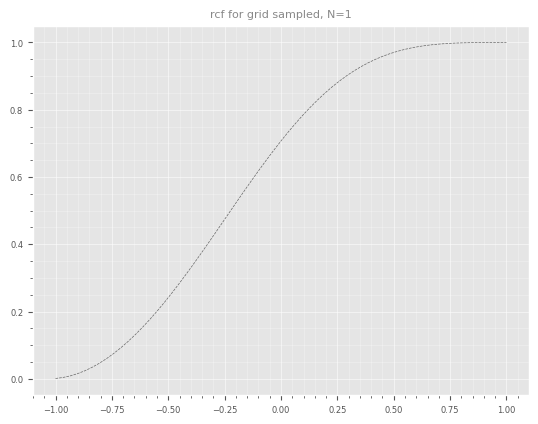

In [6]:
oi=r.order_indexes()
fig,ax=plt.subplots()
plot_ts(ax,t,r[oi],title='rcf for '+ r.type()+' sampled, N='+str(r.param()))

In [7]:
r=rcfis.mid(32)

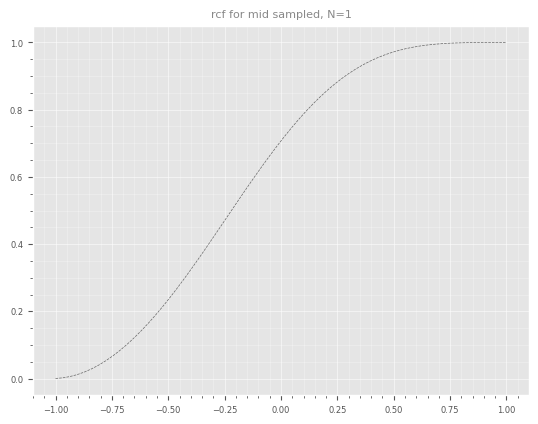

In [8]:
t=np.linspace(-1,1,len(r))
oi=r.order_indexes()
fig,ax=plt.subplots()
plot_ts(ax,t,r[oi],title='rcf for '+ r.type()+' sampled, N='+str(r.param()))

In [9]:
def test_rcf_identity(r):
    E=int(np.ceil(len(r)/2))
    for i in range(E):
        if r.type()=='mid':
            ans=np.isclose(r[i]*r[i]+r[-i-1]*r[-i-1],1.0)
        else:
            ans=np.isclose(r[i]*r[i]+r[-i]*r[-i],1.0)
        if ans==False:
            break
    return ans

In [10]:
test_rcf_identity(r)

True

In [11]:
r=rcfis.grid(32)
test_rcf_identity(r)

True

## 折叠算子$U$和逆折叠算子$U^*$

```{literalinclude} ../../../src/python/lft/fold.py
---
language: python
---
```

`fipc`，`uips`：

`fips`，`uipc`:


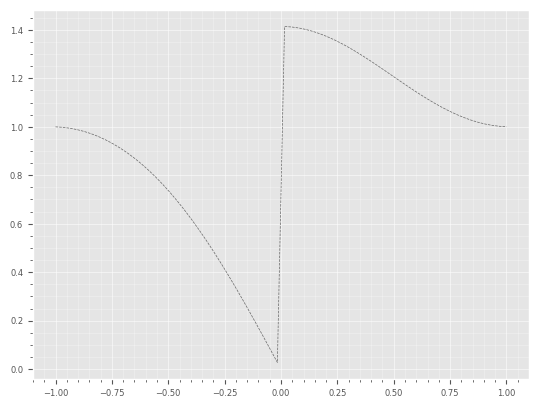

In [12]:
r=rcfis.mid(32)
t=np.linspace(-1,1,len(r))
one=np.repeat(1.0,len(t))
fold.fipc(one,r)
fig,ax=plt.subplots()
oi=qisignal.order_indexes(len(t),int(len(t)/2))
plot_ts(ax,t,one[oi])

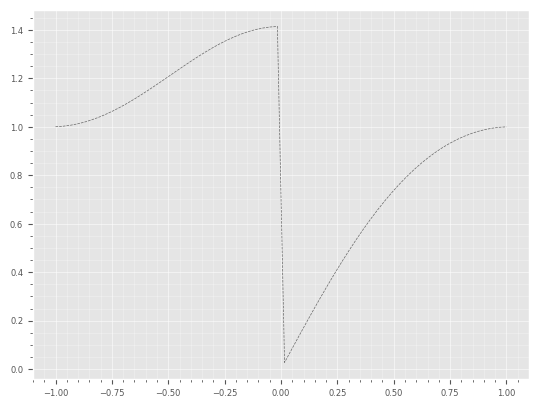

In [13]:
one=np.repeat(1.0,len(t))
fold.uipc(one,r)
fig,ax=plt.subplots()
oi=qisignal.order_indexes(len(t),int(len(t)/2))
plot_ts(ax,t,one[oi])

##### 验证恒等式 $U^*U=UU^*$

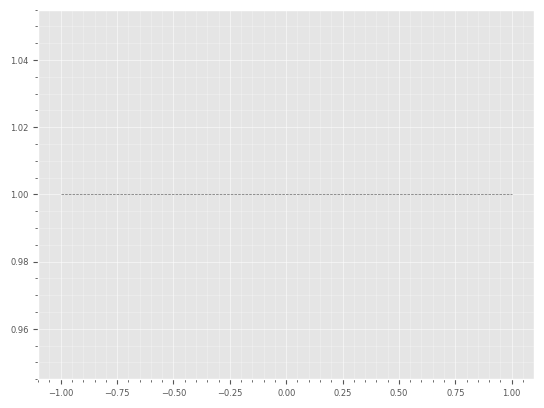

In [14]:
one=np.repeat(1.0,len(t))
fold.fipc(one,r)
fold.uipc(one,r)
fig,ax=plt.subplots()
plot_ts(ax,t,one[oi])

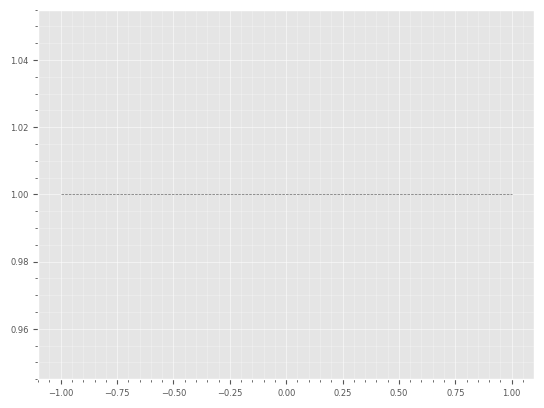

In [15]:
one=np.repeat(1.0,len(t))
fold.fips(one,r)
fold.uips(one,r)
fig,ax=plt.subplots()
plot_ts(ax,t,one[oi])

##### 单边磨光

###### 信号的预备
我们所构造的信号$x(t)$由数组表达，通常数组的顺序是按$t$从小到大的排序，如下图所示：

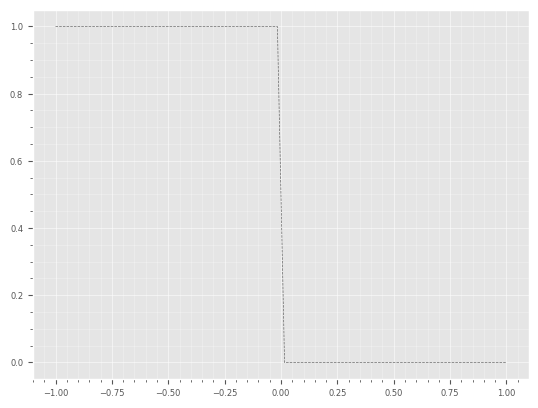

In [16]:
x=[1 if v<0 else 0 for v in t]
fig,ax=plt.subplots()
plot_ts(ax,t,x)

In [17]:
oi=list(range(len(t)))
left_rotate(oi,int(len(t)/2))

**注意**：下面的`np.array`的用法，默认的`dtype`是`int`，所以`dtype='float'`不能漏掉。

In [18]:
x=np.array(x,dtype='float')

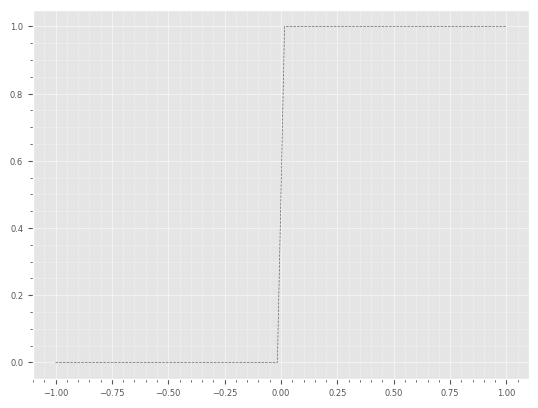

In [19]:
fig,ax=plt.subplots()
plot_ts(ax,t,x[oi])

`signal`这个类就是方便这种数据的预处理：数组是按算法的要求将原来的顺序变成$[x(t_0),x(t_1)\cdots,x(t_E),x(t_{-E}),x(t_{-E+1}),\cdots,x(t_{-1})]$来存储，但是类中的`plot`函数是按原来的顺序显示。

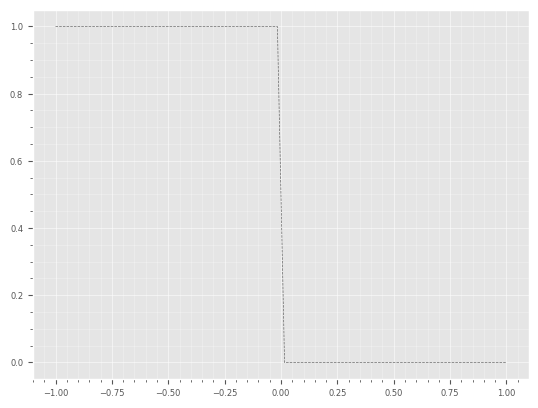

In [20]:
x1=signal_p(t,x)
fig,ax=plt.subplots()
x1.plot(ax)

###### 右边磨光用`fipc`或`uips`

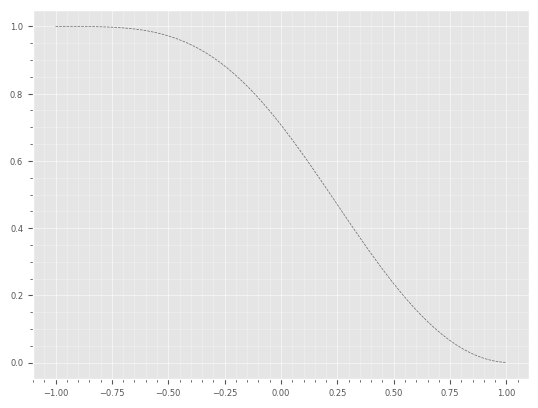

In [21]:
fold.fipc(x1,r)
fig,ax=plt.subplots()
x1.plot(ax)

###### 左边磨光用`fips`或`uipc`

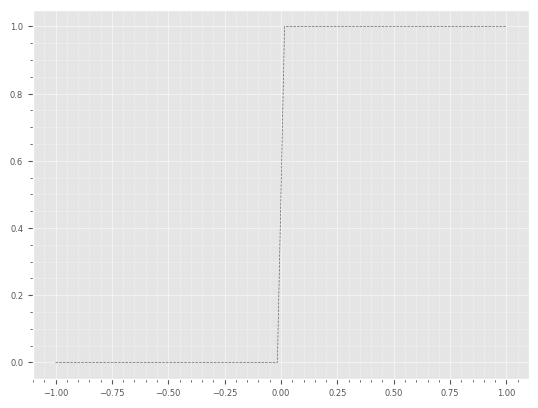

In [23]:
x=np.array([0 if v<0 else 1 for v in t],dtype='float')
x1=signal_p(t,x)
fig,ax=plt.subplots()
x1.plot(ax)

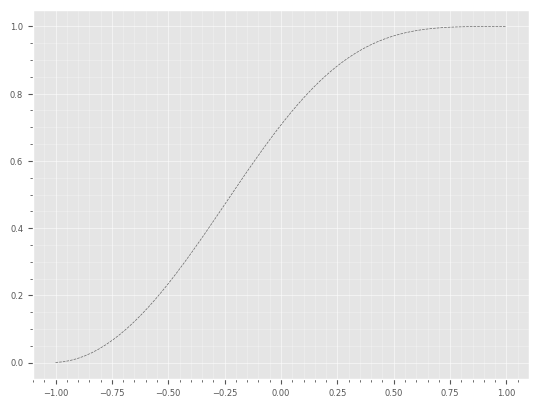

In [24]:
fold.uipc(x1,r)
fig,ax=plt.subplots()
x1.plot(ax)

##### 双边磨光

#### 对函数的操作

### 内积

In [25]:
t=np.linspace(-1,1,len(r))
N=len(t)
ec=np.ndarray(shape=(N,N),dtype=float)
es=np.ndarray(shape=(N,N),dtype=float)
for v in range(N):
    delta=np.repeat(0.0,N)
    delta[v]=1
    tmp=np.fft.ifft(delta)
    ec[v]=np.real(tmp)
    es[v]=np.imag(tmp)

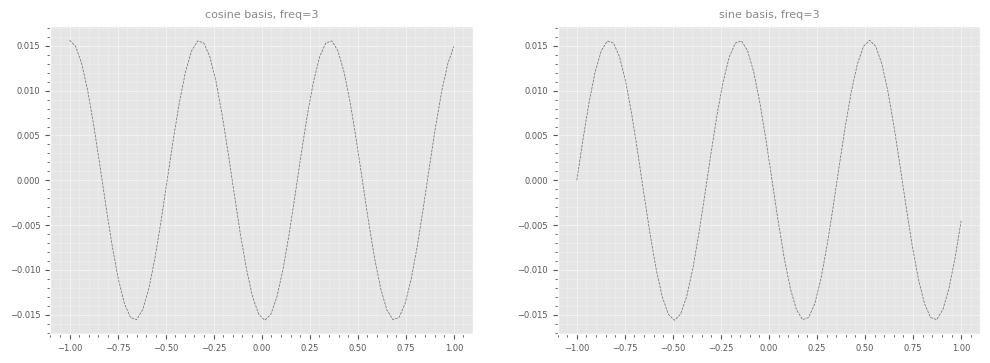

In [26]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
v=3
plot_ts(axes[0],t,ec[3],title='cosine basis, freq='+str(v))
plot_ts(axes[1],t,es[3],title='sine basis, freq='+str(v))